In [1]:
#importing initial required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Speed Dating Dataset Objectives:
- answering specific questions out of curiosity (in EDA portion)
- Determine which factors best help predict whether a match occurs with a partner
- build a predictive model that takes user inputs before interaction and predicts whether a match will occur (done with different features than objective #1)


In [3]:
data = pd.read_csv('Speed_Dating_Data.csv', encoding = 'ISO-8859-1')

In [4]:
df = data.copy()

In [5]:
#inspecting data
pd.set_option('display.max_columns', 500)
data.head(5)

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,1,11.0,0,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,2,12.0,0,0.54,0,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,3,13.0,1,0.16,1,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,4,14.0,1,0.61,0,23.0,2.0,30.0,5.0,15.0,40.0,5.0,5.0,1,7.0,8.0,9.0,8.0,9

# Data Cleaning

In [6]:
#renaming unintuitively named columns
data = data.rename(columns={'condtn': 'condition', 'age_o':'age_partmer', 'race_o': 'race_partner', 'date': 'date_frequency', })

In [7]:
#for preference scales, waves 1-5 and 10-20 used a 100 point allocation; waves 6-9 used a 1-10 scale. Thus, waves 6-9 will be dropped.
data = data.drop(data[(data.wave==6) | (data.wave==7) | (data.wave==8) | (data.wave==9)].index, axis=0)


In [8]:
data.shape

(6816, 195)

There's a lot of freakin features, many interrelated, in this dataset. Lets whittle them down to ones that will most likely actually help us. We'll worry about null values after we've selected which columns we think might be necessary

In [9]:
#went through column descriptions to find unecessary columns
unecessary_columns = ['condition','round', 
                      'position', 'positin1', 
                      'order', 'undergra', 
                      'zipcode', 'from', 'exphappy', 
                      'attr4_1', 'sinc4_1', 'intel4_1', 
                      'fun4_1', 'amb4_1', 'shar4_1', 
                      'attr2_1', 'sinc2_1', 'intel2_1', 
                      'fun2_1', 'amb2_1', 'shar2_1', 
                      'attr3_1', 'sinc3_1', 'intel3_1', 
                      'fun3_1', 'amb3_1']


In [10]:
data = data.drop(columns=unecessary_columns)

In [11]:
data = data.iloc[:,:82]

In [12]:
data = data.drop(columns=['field', 'field_cd'])

There's a good bit of null values here. Lets make a plan for them:
- drop columns with a null value percentage greater than 25%
- impute remaining null values with the median value of the participant's respective gender for the column (except for career, this will be imputed with the mode for the career column).  

In [13]:
pd.set_option('display.max_rows', 500)
data.isnull().sum()/len(data)*100

iid                0.000000
id                 0.014671
gender             0.000000
idg                0.000000
wave               0.000000
partner            0.000000
pid                0.146714
match              0.000000
int_corr           2.171362
samerace           0.000000
age_partmer        1.452465
race_partner       0.997653
pf_o_att           1.232394
pf_o_sin           1.232394
pf_o_int           1.232394
pf_o_fun           1.364437
pf_o_amb           1.496479
pf_o_sha           1.819249
dec_o              0.000000
attr_o             2.992958
sinc_o             3.858568
intel_o            4.049296
fun_o              4.474765
amb_o              8.714789
shar_o            12.529343
like_o             3.257042
prob_o             4.093310
met_o              5.032277
age                1.320423
mn_sat            54.034624
tuition           47.432512
race               0.850939
imprace            1.085681
imprelig           1.085681
income            50.953638
goal               1

In [14]:
#drop columns that have a null percentage of more than 25 percent:
def null_dropper(data):
    null_columns=[]
    for column in data.columns:
        if data[column].isnull().sum()/len(data)*100 > 25:
            null_columns.append(column)
    return null_columns          


null_dropper(data)

['mn_sat',
 'tuition',
 'income',
 'expnum',
 'attr5_1',
 'sinc5_1',
 'intel5_1',
 'fun5_1',
 'amb5_1']

In [15]:
data = data.drop(columns=null_dropper(data))

In [16]:
#filling numerical columns with the mean for that column
for column in data.columns:
    if (data[column].dtype != 'object'):
        data[column] = data[column].fillna(np.mean(data[column]))
data['career'] = data.career.fillna(data.career.value_counts().index[0])

# Exploratory Data Analysis

Good, we got our 195 column dataset down to a more manageable 71 features. Later on, when building our predictive model to assess feature importance and creating a model to assess before-interaction match success probability, we'll drop columns that occur after the interaction. For now, let's do some EDA to get more familiar with our data and get answers to some random questions...

I really want to look into the different preferences and interest of males and females in this study. I would think that males would give things like attractiveness more weight, while females would value things like sincerity and intelligence more.

In [17]:
#remember that 0 is coded as female and 1 is coded as male
data.corr()['gender'][(data.corr()['gender']>.2) | (data.corr()['gender']< .2-.4)]


gender      1.000000
pf_o_att   -0.380949
pf_o_amb    0.365263
imprelig   -0.203393
sports      0.290731
museums    -0.233714
art        -0.239846
gaming      0.289649
theater    -0.339691
shopping   -0.287276
yoga       -0.252157
attr1_1     0.381773
amb1_1     -0.365578
Name: gender, dtype: float64

- Males definitely tend to value attractiveness of their partner, while females definitely prefer males to be ambitious
- interestingly, females tend to place more weight on the religious values of their potential partner
- women are much more into art, shopping, and yoga, while men are more into sports and gaming. Revolutionary finding.


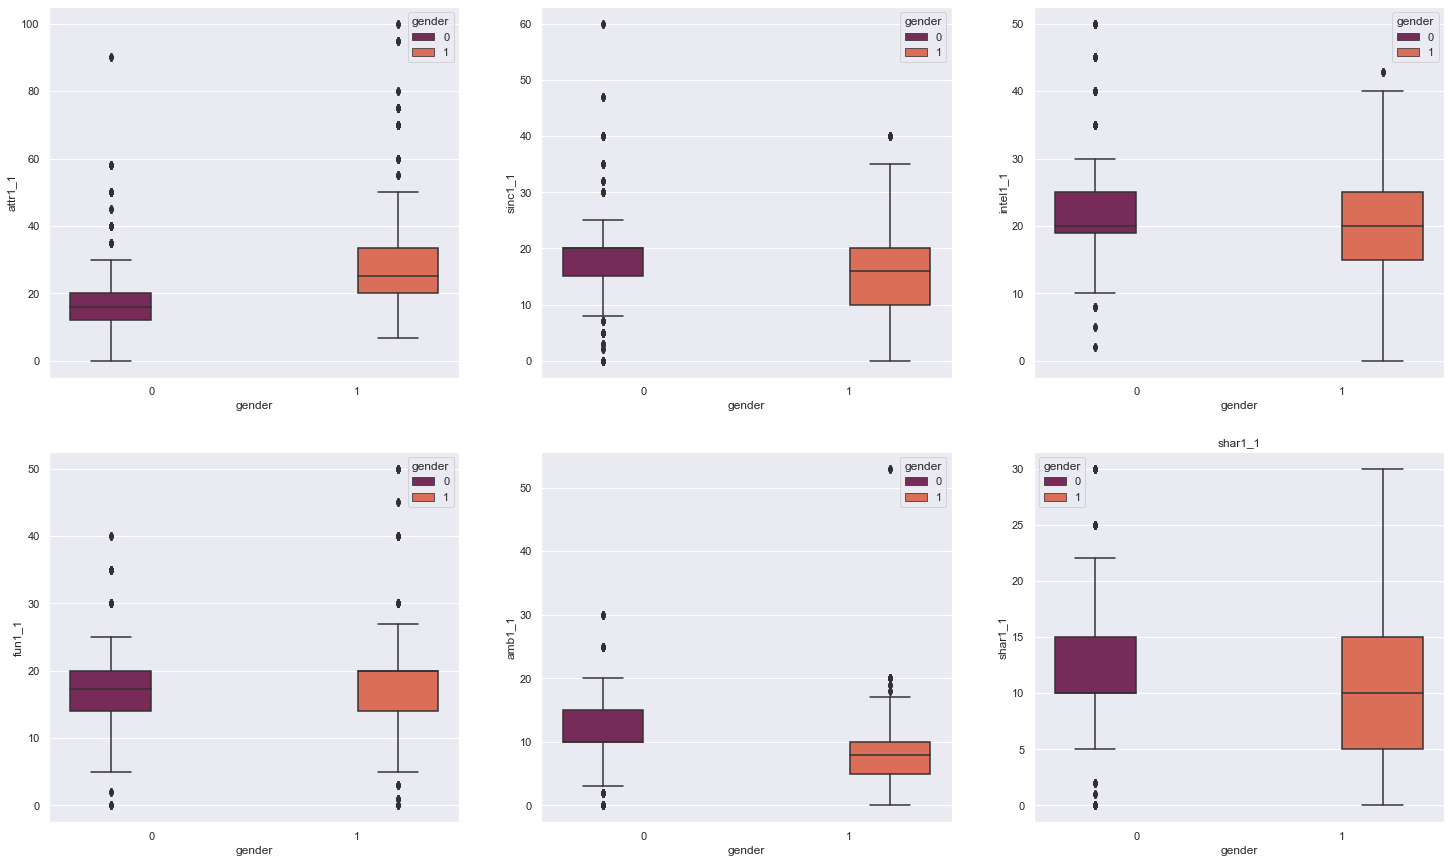

In [18]:
preference_columns= ['attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1']

fig, axes = plt.subplots(2, 3, figsize=(25, 15))
for i in range(3):
    sns.boxplot(x='gender', y=preference_columns[i], data=data, hue='gender', palette='rocket', ax = axes[0][i])
    plt.title(preference_columns[i])
for i in range(3):
    sns.boxplot(x='gender', y=preference_columns[i+3], data=data, hue='gender', palette='rocket', ax = axes[1][i])
    plt.title(preference_columns[i+3])
plt.show()

Is there a statistically significant difference for each of the 5 preference values. There should be a significant difference for both attractiveness and ambition preferences

In [19]:
male = data[data.gender==1]
female=data[data.gender==0]

In [20]:
from scipy.stats import ttest_ind

different_means = []
similar_means = []
for col in preference_columns:
    test_statistic, p_value = ttest_ind(male[col], female[col])
    print(f"Feature: {col}")
    
    male_statistics = male[col].describe()
    female_statistics = female[col].describe()
    
    print(f"Male: mean: {male_statistics['mean']}, std: {male_statistics['std']}")
    print(f"Female: mean: {female_statistics['mean']}, std: {female_statistics['std']}")
    print(f"The test statistic for the two sample t-test of {col} is {test_statistic} and the corresponding p-value is {p_value}.")
    
    if p_value < .05:
        print(f"Mean of {col} is different")
        different_means.append(col)
    else:
        print(f"Mean of {col} is different")
        similar_means.append(col)
    print()
print('Similar Means: ', similar_means)
print('Different Means: ', different_means)

Feature: attr1_1
Male: mean: 29.07885475839974, std: 14.14261532177681
Female: mean: 18.871298408501108, std: 10.260529234796598
The test statistic for the two sample t-test of attr1_1 is 34.09686995199511 and the corresponding p-value is 2.048556056784344e-235.
Mean of attr1_1 is different

Feature: sinc1_1
Male: mean: 16.239367781050387, std: 7.7992683744893805
Female: mean: 18.359967099370408, std: 7.36808595674801
The test statistic for the two sample t-test of sinc1_1 is -11.537709071762764 and the corresponding p-value is 1.6336996255484343e-30.
Mean of sinc1_1 is different

Feature: intel1_1
Male: mean: 19.570448277273716, std: 7.3372598301936245
Female: mean: 21.55245663235527, std: 7.316412385077576
The test statistic for the two sample t-test of intel1_1 is -11.166626379027251 and the corresponding p-value is 1.0530098338153917e-28.
Mean of intel1_1 is different

Feature: fun1_1
Male: mean: 17.65506773409628, std: 7.127123917567629
Female: mean: 17.048454045738186, std: 6.020

All of the preferences show a significant difference between genders, probably becasuse of the sample size

Let's see if there's a difference between males and females in terms of how likely they are to be rejected

dec_o      0     1
gender            
0       1852  1551
1       2124  1289
P-value from chi-square analysis: 7.278117631194625e-11


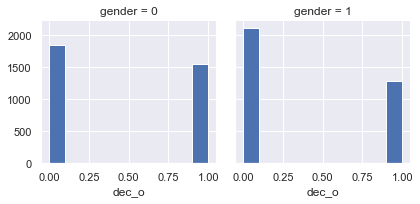

In [23]:
g = sns.FacetGrid(data, col="gender")
g = g.map(plt.hist, "dec_o")
plt.ticklabel_format(useOffset=False, style='plain')

table = pd.crosstab(data['gender'], data['dec_o'])
print(table)
from scipy.stats import chi2_contingency
chi2, pval, dof, expected = chi2_contingency(table)
print(f'P-value from chi-square analysis: {pval}')

Clearly, men are getting rejected disproportionately.

The mn_sat column gives a proxy for intelligence, giving the median SAT score from the college the participant attended. Do people with a that go to colleges with higher median SAT scores value intelligence more in their partner?

In [24]:
#have to get this from original dataframe because column has a lot of null values
#what's the median SAT score? Just curious
df = df.dropna(subset=['mn_sat'])
df['mn_sat'] = df['mn_sat'].str.replace(',','').astype('float64')

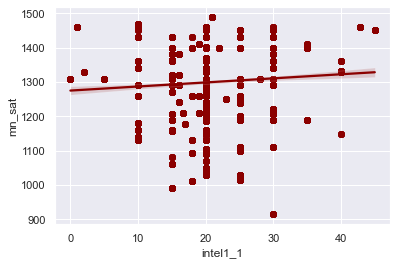

0.07171291395429606


In [25]:
sns.regplot(x="intel1_1", y="mn_sat", data=df, color='darkred')
plt.show()
print(df.corr()['mn_sat']['intel1_1'])


Not too much of a correlation to write home about. How does intelligence changes how people view the other preferences?

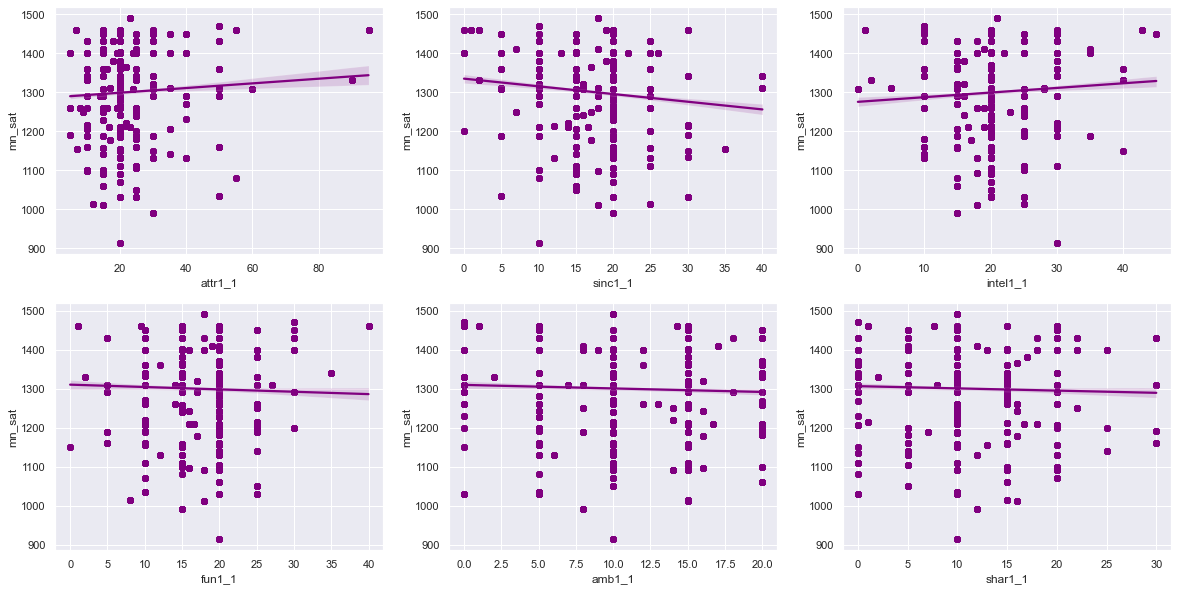

In [26]:
df = df.dropna(subset=['shar1_1'])


fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i in range(3):
    sns.regplot(x=preference_columns[i], y='mn_sat', data=df, color='purple', ax = axes[0][i])
for i in range(3):
    sns.regplot(x=preference_columns[i + 3], y = "mn_sat", data=df, color='purple', ax = axes[1][i])
plt.show()


Intelligence doesn't seem to have a very large effect on preferences (significant values being related to large sample size)

The go_out column looks like it could make a good proxy for sociableness, asking how often does the participant go out (Several times a week=1, Twice a week=2, Once a week=3, Twice a month=4, Once a month=5, Several times a year=6, Almost never=7).
I wonder how this measure interacts with other factors...

In [27]:
data['go_out'] = np.round(data.go_out, 2)
data['go_out'] = data['go_out'].replace(2.16, 2).map({1:7, 2:6, 3:5, 4:4, 5:3, 6:2, 7:1})
data.go_out.value_counts()

6    2399
7    2235
5    1513
4     384
3     149
2      99
1      37
Name: go_out, dtype: int64

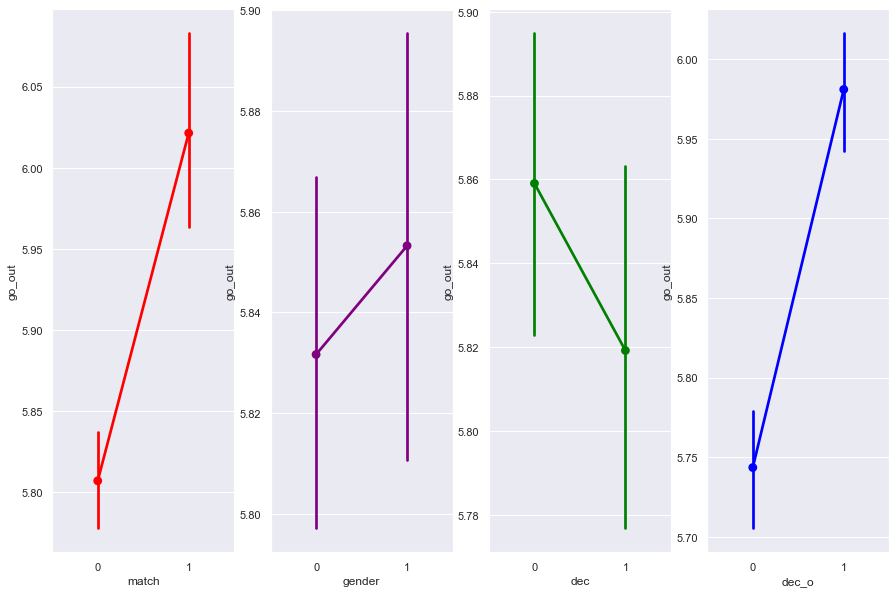

In [28]:
fig, axes = plt.subplots(1, 4, squeeze=False, figsize=(15, 10))

columns = ['match', 'gender', 'dec', 'dec_o']
color = ['red', 'purple', 'green', 'blue']
for i in range(4):
    sns.pointplot(x=columns[i], y='go_out', data=data, color=color[i], ax = axes[0][i])
plt.show()


Although its only a slight difference, on average the people that get matches go out more than those who don't. They also are more likely to get a "yes" decision from their partner, but do not give a "yes" back more. Males and females seem to go out about the same amount.

The date_frequency column is similar to the go_out column, asking participants how often they go on dates. Lets see if the results of this are similar to those of the go_date feature:

In [29]:
data['date_frequency'] = np.round(data.date_frequency, 2)
data['date_frequency'] = data['date_frequency'].replace(5.01, 5).map({1:7, 2:6, 3:5, 4:4, 5:3, 6:2, 7:1})
data.date_frequency.value_counts()


4    1683
2    1669
3    1296
1    1216
5     610
6     268
7      74
Name: date_frequency, dtype: int64

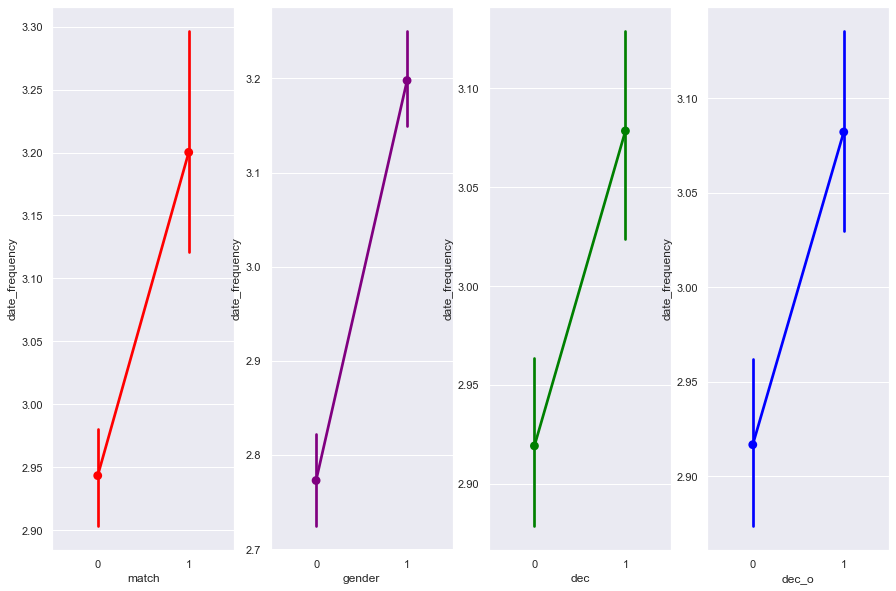

In [30]:
fig, axes = plt.subplots(1, 4, squeeze=False, figsize=(15, 10))

columns = ['match', 'gender', 'dec', 'dec_o']
color = ['red', 'purple', 'green', 'blue']
for i in range(4):
    sns.pointplot(x=columns[i], y='date_frequency', data=data, color=color[i], ax = axes[0][i])
plt.show()


I guess experience pays off...
It's interesting though that apparently men go on more dates than women, even though they go out in general around the same amount. Let's check this out a tiny bit more.

In [31]:
data.groupby('gender').date_frequency.agg(['mean', 'median'])

,mean,median
gender,,
0,2.772847,2.0
1,3.197773,3.0


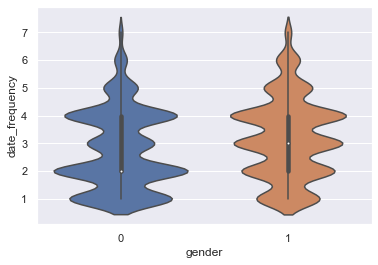

In [35]:
sns.violinplot(x='gender', y='date_frequency', data=data)
plt.show()

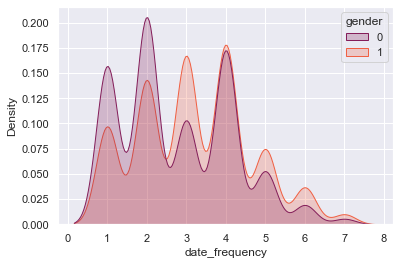

In [36]:
sns.kdeplot('date_frequency', data=data, hue='gender',shade=True, palette='rocket')
plt.show()


The EDA is getting more interesting than the dates probably were. I think there's a few things that this data might be indicating:
- guys going on more dates but going out less total mean girls go out more with their friends, whereas when guys go out its more likely that they're going out for a date.
- Generally, guys have a much looser definition of what a date is than women do. This could explain males thinking they go on dates that the girl might have thought were not.
- Males and females might be coming to these speed dating events for different reasons, with guys being much more focused on finding a partner.

Actually, we can figure out if that very last part is true. The goal column has the following values: Seemed like a fun night out=1, To meet new people=2, To get a date=3, Looking for a serious relationship=4, To say I did it=5, Other=6. Lets see how the proportions of males and females change with these goals


In [37]:
data['goal'] = np.round(data['goal'], 2).replace(2.13, 2)
data['purpose'] = data['goal'].map({1:'non-romantic', 2: 'non-romantic', 3:'romantic', 4:'romantic', 5:'non-romantic', 6:'non-romantic'})
pd.crosstab(data['gender'], data['purpose'])

purpose,non-romantic,romantic
gender,,
0,3215,188
1,2875,538


A much greater percentage of males going for romantic reasons.

Looking into the demographic groupings a little more...

Starting with age:

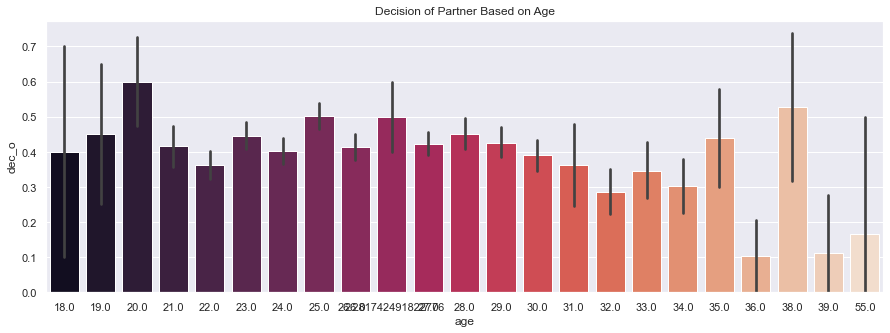

<Figure size 432x288 with 0 Axes>

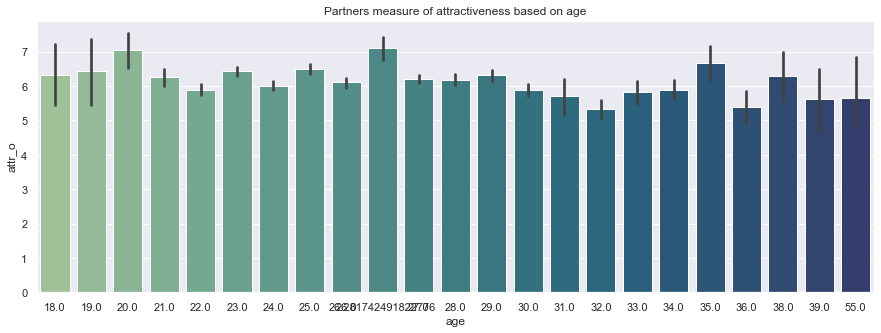

/Users/jordanbritt/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 432x288 with 0 Axes>

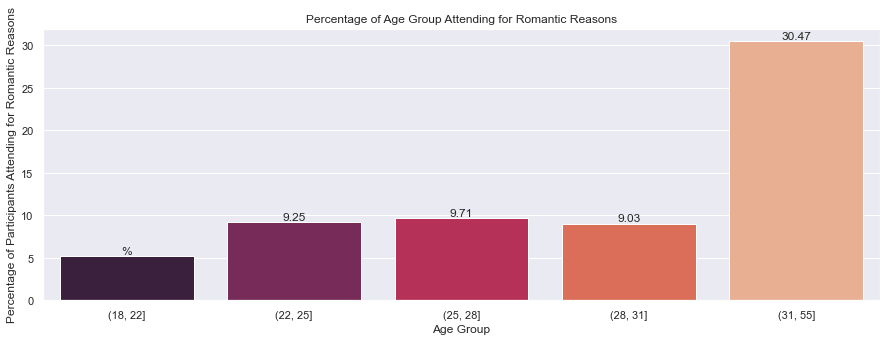

<Figure size 432x288 with 0 Axes>

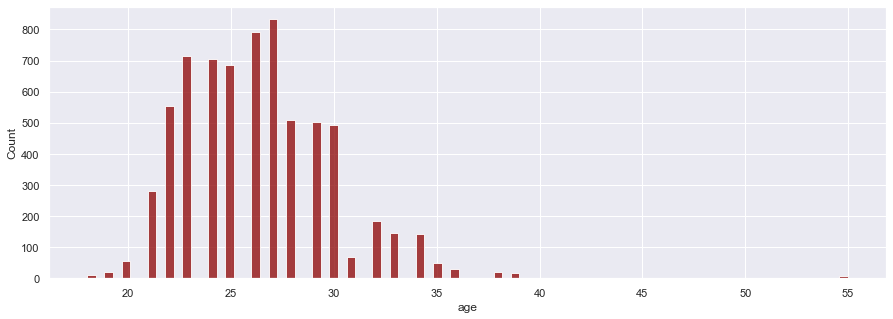

In [38]:
#assessing decision of partner based on age
figure = plt.figure(figsize=(15,5))
sns.barplot(y="dec_o", x= "age",data=data, palette='rocket')
plt.title('Decision of Partner Based on Age')
plt.show()
plt.clf()

#assessing attractiveness based on age
figure = plt.figure(figsize=(15,5))
sns.barplot(y="attr_o", x= "age",data=data, palette='crest')
plt.title('Partners measure of attractiveness based on age')
plt.show()
plt.clf()

#seeing there's a link between age and intentions of coming to the speed dating event (romantic vs non-romantic intentions)
data2 = data.copy()
data2['age_bins'] = pd.cut(data['age'], bins = [18, 22, 25, 28, 31, 55])
data2 = pd.DataFrame(data2.groupby('purpose').age_bins.value_counts()).rename(columns={'age_bins': 'count'}).reset_index().set_index('level_1')
data2_pivoted = data2.pivot(columns='purpose')
data2_pivoted['proportion'] = (data2_pivoted['count']['romantic'] / (data2_pivoted['count']['non-romantic'] + data2_pivoted['count']['romantic']))*100
data2_pivoted = data2_pivoted.droplevel(0, axis=1)
data2_pivoted.columns = ['non-romantic', 'romantic', 'proportion']
data2_pivoted['proportion'] = np.round(data2_pivoted.proportion, 2)
figure = plt.figure(figsize=(15,5))
ax = sns.barplot(data2_pivoted.index, data2_pivoted['proportion'], palette='rocket')
ax.bar_label(ax.containers[0], '%')
plt.title('Percentage of Age Group Attending for Romantic Reasons')
plt.xlabel('Age Group')
plt.ylabel('Percentage of Participants Attending for Romantic Reasons')
plt.show()
plt.clf()

#histogram of age values for reference
figure = plt.figure(figsize=(15, 5))
sns.histplot(data['age'], color='darkred')
plt.show()


20 year olds seem to be the most wanted age group. After around 26, as you get older you seem to be chosen by your partner less and less, probably because most of the participants want someone around their age (with most participants being under 26).

There's not a lot of inferences we can make definitively from the percentage of each age group attending for romantic reasons, but a trend does appear that the older you get the higher the likelihood you'd go to the speed dating event for romantic reasons. This goes against what I would have thought, but this can probably be explained by speed dating being something that older individuals don't do if they're just going out to go out.

We can gain a little insight into this real quick by seeing if people go out more or less as they age

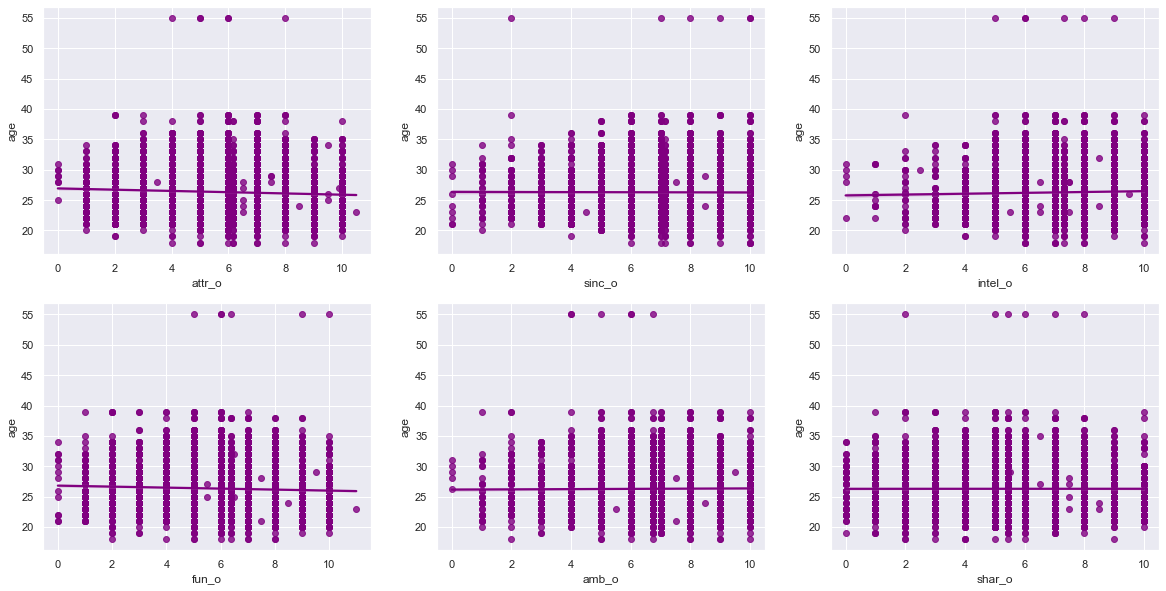

attr_o Correlation with Age: -0.05580321420134868
sinc_o Correlation with Age: -0.004246696731250902
intel_o Correlation with Age: 0.030228066544034843
fun_o Correlation with Age: -0.04422428481928856
amb_o Correlation with Age: 0.009668477983323895
shar_o Correlation with Age: 0.0003987888590762385


In [39]:
partner_rating_columns = ['attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o']

fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i in range(3):
    sns.regplot(x=partner_rating_columns[i], y='age', data=data, color='purple', ax = axes[0][i])
for i in range(3):
    sns.regplot(x=partner_rating_columns[i + 3], y = "age", data=data, color='purple', ax = axes[1][i])
plt.show()
for column in partner_rating_columns:
    correlation = data.corr()[column]['age']
    print(f'{column} Correlation with Age: {correlation}')


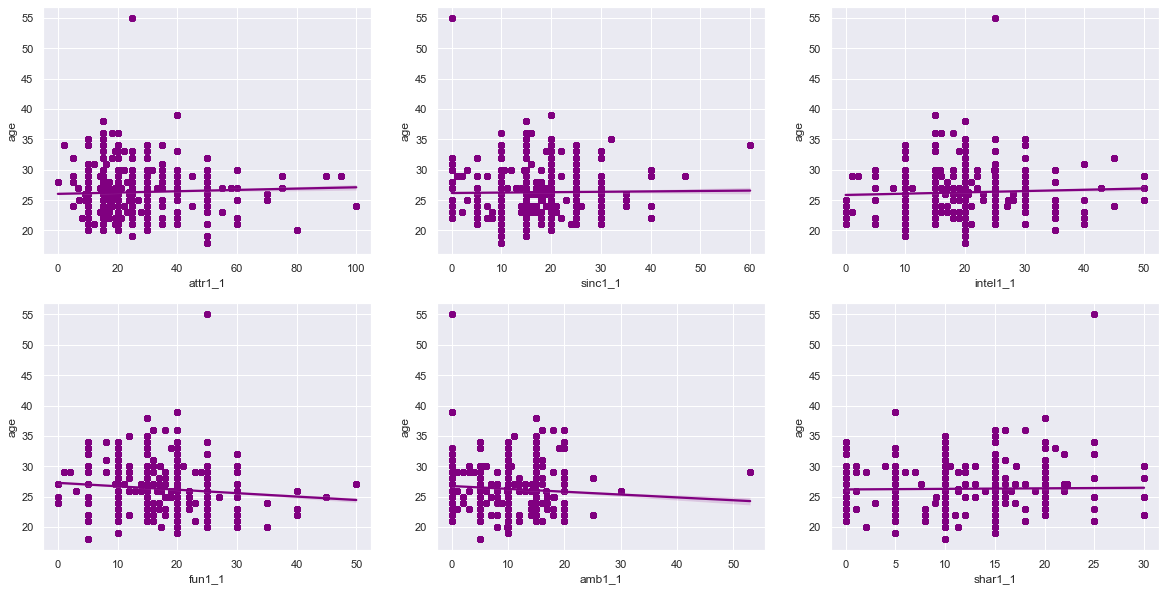

attr1_1 Correlation with Age: 0.04058698184530504
sinc1_1 Correlation with Age: 0.014002614831076919
intel1_1 Correlation with Age: 0.0442050906304179
fun1_1 Correlation with Age: -0.10491726904533777
amb1_1 Correlation with Age: -0.07998656965493448
shar1_1 Correlation with Age: 0.01696754697032823


In [40]:
df = df.dropna(subset=['shar1_1'])


fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i in range(3):
    sns.regplot(x=preference_columns[i], y='age', data=data, color='purple', ax = axes[0][i])
for i in range(3):
    sns.regplot(x=preference_columns[i + 3], y = "age", data=data, color='purple', ax = axes[1][i])
plt.show()

for column in preference_columns:
    correlation = data.corr()[column]['age']
    print(f'{column} Correlation with Age: {correlation}')

Nothing too significant here. These are super tiny correlations, but as you get older you do seem to value attractiveness and intelligence a little more, and ambition and fun a little less.

/Users/jordanbritt/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


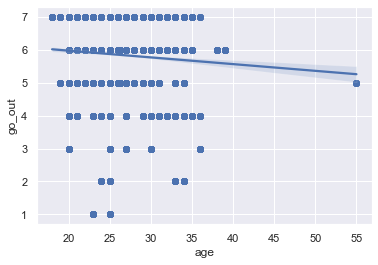

-0.0634279920043489

In [41]:
data['age_bins'] = pd.cut(data['age'], bins = [18, 22, 25, 28, 31, 55])
sns.regplot(data.age, data.go_out)
plt.show()
data.corr()['age']['go_out']

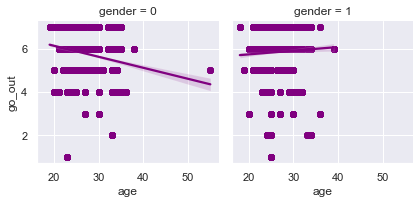

Correlation between age and going out for females: -0.17848699671454954
Correlation between age and going out for males: 0.04684119026831868


In [43]:
#seeing if this varies by gender
males = data[data.gender==1]
females = data[data.gender==0]
data['age_bins'] = pd.cut(data['age'], bins = [18, 22, 25, 28, 31, 55])
g = sns.FacetGrid(data, col='gender')
g.map(sns.regplot, 'age', 'go_out', color='purple')
plt.show()

females_correlation = females.corr()['age']['go_out']
males_correlation = males.corr()['age']['go_out']
print(f'Correlation between age and going out for females: {females_correlation}')
print(f'Correlation between age and going out for males: {males_correlation}')


It's weird that according to these charts women tend to go out much less as they age, whereas men go out slightly more on average as they age.

Now on to race...

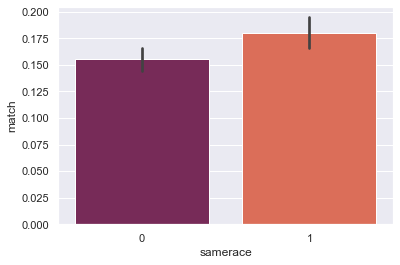

In [42]:
sns.barplot(x='samerace', y='match', data=data, palette='rocket')
plt.show()

/var/folders/q5/rk21gzmd3yndf_3sb7wt4bjm0000gn/T/ipykernel_81727/150372458.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data.groupby('race_values')['imprace', 'imprelig'].agg('mean', 'median').plot(kind='bar')


Text(0, 0.5, 'importance')

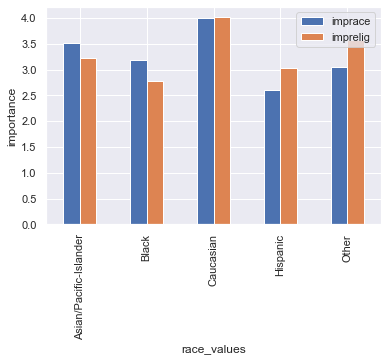

In [43]:
race_values = {1: 'Black', 2: 'Caucasian', 3: 'Hispanic', 4: 'Asian/Pacific-Islander', 5: 'Native American', 6: 'Other'}
data['race_values']=np.round(data['race'],0).map(race_values)
data.groupby('race_values')['imprace', 'imprelig'].agg('mean', 'median').plot(kind='bar')
plt.ylabel('importance')


Text(0.5, 1.0, 'Preference for six characteristics by race')

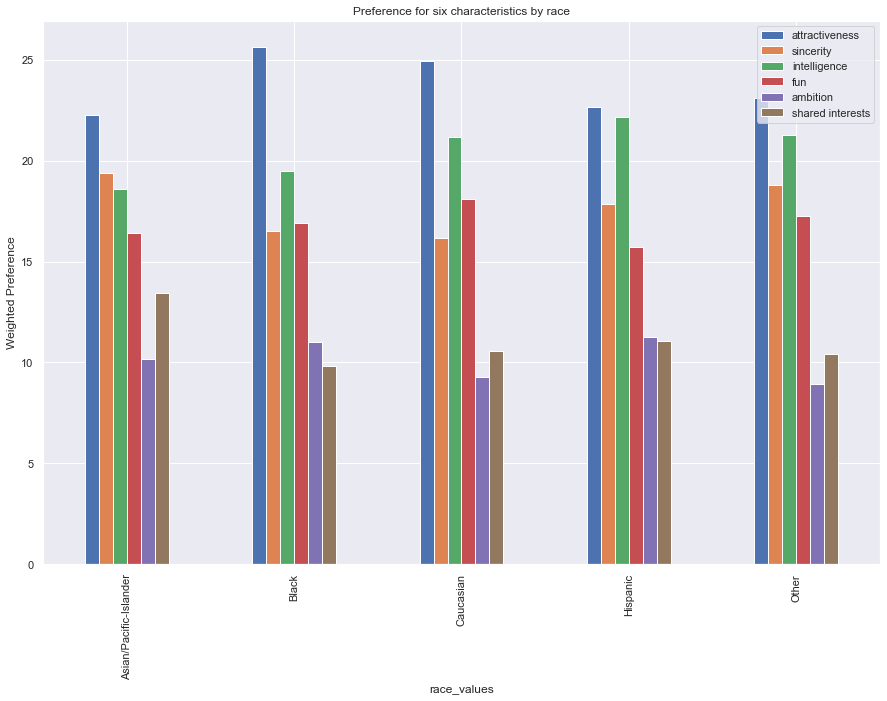

In [44]:
data_race = data.groupby('race_values')[preference_columns].agg(['mean'])
data_race.plot(kind='bar', figsize=(15, 10))
plt.legend(['attractiveness', 'sincerity', 'intelligence', 'fun', 'ambition', 'shared interests'])
plt.ylabel('Weighted Preference')
plt.title('Preference for six characteristics by race')

Text(0.5, 1.0, 'Preference for six characteristics by race')

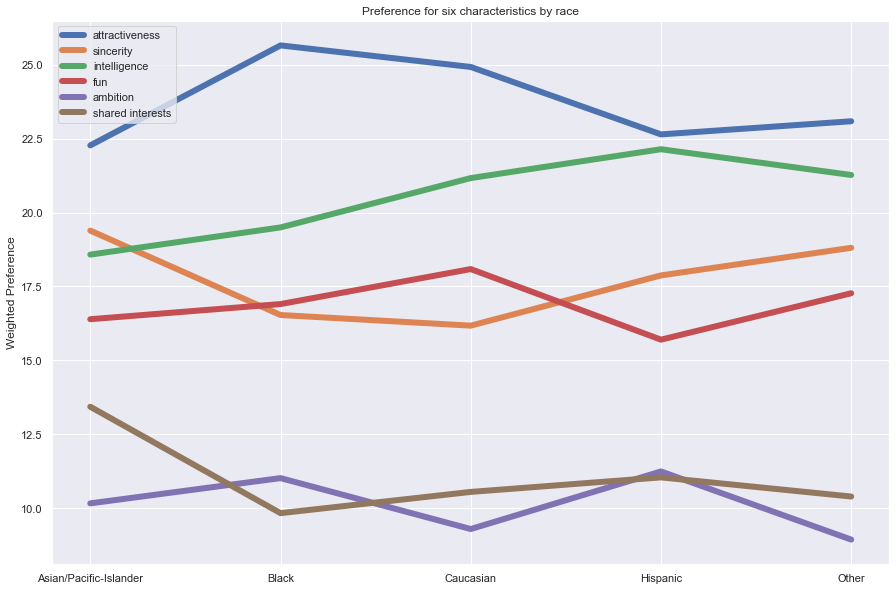

In [45]:
#didn't really like how the bar chart displayed information, lets try another
plt.subplots(figsize=(15, 10))
for column in preference_columns:
    plt.plot(data_race.index, data_race[column], linewidth=6)
plt.legend(['attractiveness', 'sincerity', 'intelligence', 'fun', 'ambition', 'shared interests'])
plt.ylabel('Weighted Preference')
plt.title('Preference for six characteristics by race')


All races seem to values attractiveness the most, with Hispanics getting the closest to overtaking it with sincerity. There's not too many other significant differences, it's interesting thought that asians were the only racial group that put sincerity over overall intelligence in total importance.

Text(0.5, 1.0, 'Partners average rating of attributes by race')

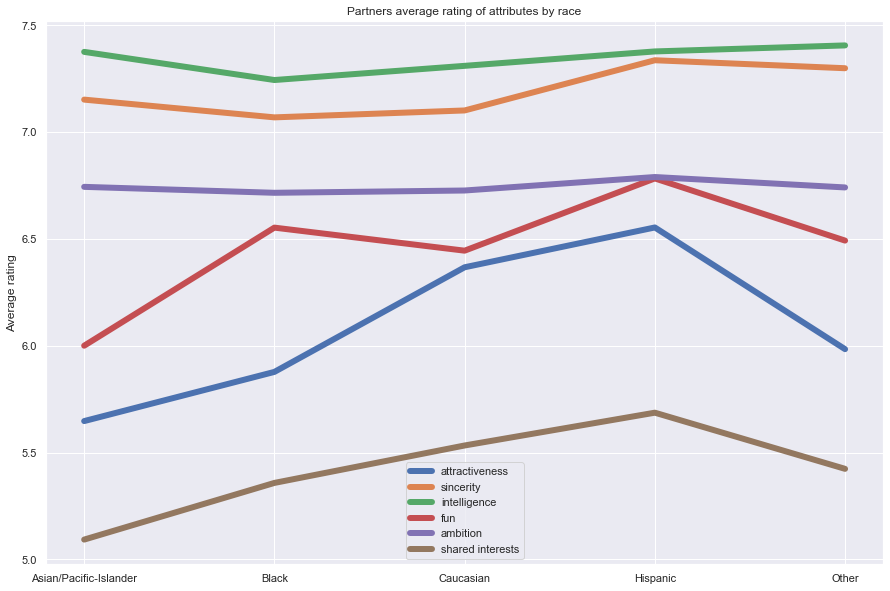

In [46]:
data_race = data.groupby('race_values')[partner_rating_columns].agg(['mean'])
plt.subplots(figsize=(15, 10))
for column in partner_rating_columns:
    plt.plot(data_race.index, data_race[column], linewidth=6)
plt.legend(['attractiveness', 'sincerity', 'intelligence', 'fun', 'ambition', 'shared interests'])
plt.ylabel('Average rating')
plt.title('Partners average rating of attributes by race')

Hispanics seem to lead every single category besides intelligence, where they came close at second. Females did tend to get rated much higher; perhaps a greater consititution of females to males in the hispanic race category may be causing the difference?

In [48]:
print(pd.crosstab(data.race_values, data.gender))
print(pd.crosstab(data.race_values, data.gender, normalize='index'))

gender                     0     1
race_values                       
Asian/Pacific-Islander   880   769
Black                    145   163
Caucasian               1772  2014
Hispanic                 391   236
Other                    215   231
gender                         0         1
race_values                               
Asian/Pacific-Islander  0.533657  0.466343
Black                   0.470779  0.529221
Caucasian               0.468040  0.531960
Hispanic                0.623604  0.376396
Other                   0.482063  0.517937


/var/folders/q5/rk21gzmd3yndf_3sb7wt4bjm0000gn/T/ipykernel_81727/548635039.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  males['race_values']=np.round(males['race'],0).map(race_values)


Text(0.5, 1.0, 'Partners average rating of attributes by race for males')

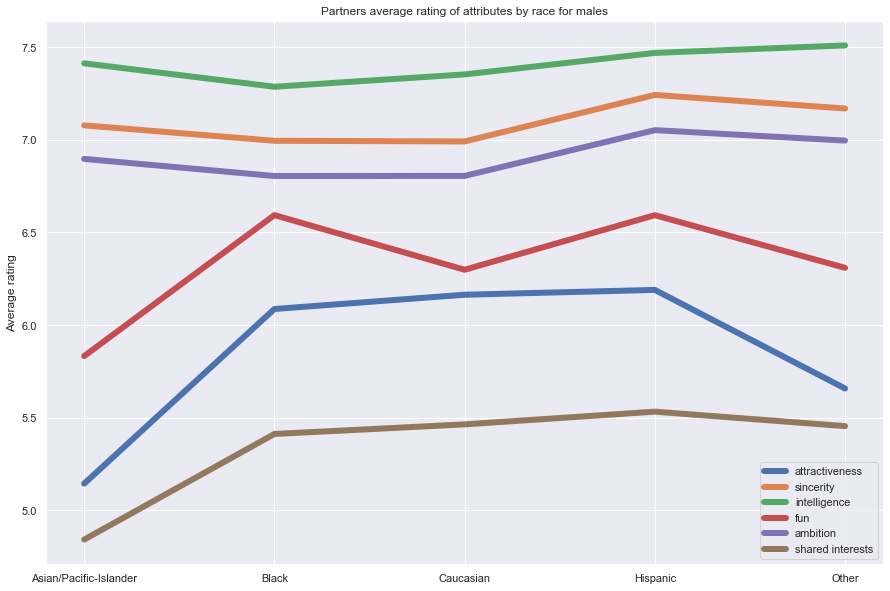

In [50]:
race_values = {1: 'Black', 2: 'Caucasian', 3: 'Hispanic', 4: 'Asian/Pacific-Islander', 5: 'Native American', 6: 'Other'}
males = data.loc[data.gender==1]
females = data.loc[data.gender==0]
males['race_values']=np.round(males['race'],0).map(race_values)
males_race = males.groupby('race_values')[partner_rating_columns].agg(['mean'])
plt.subplots(figsize=(15, 10))
for column in partner_rating_columns:
    plt.plot(males_race.index, males_race[column], linewidth=6)
plt.legend(['attractiveness', 'sincerity', 'intelligence', 'fun', 'ambition', 'shared interests'])
plt.ylabel('Average rating')
plt.title('Partners average rating of attributes by race for males')

/var/folders/q5/rk21gzmd3yndf_3sb7wt4bjm0000gn/T/ipykernel_81727/2232222439.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  females['race_values']=np.round(females['race'],0).map(race_values)


Text(0.5, 1.0, 'Partners average rating of attributes by race for females')

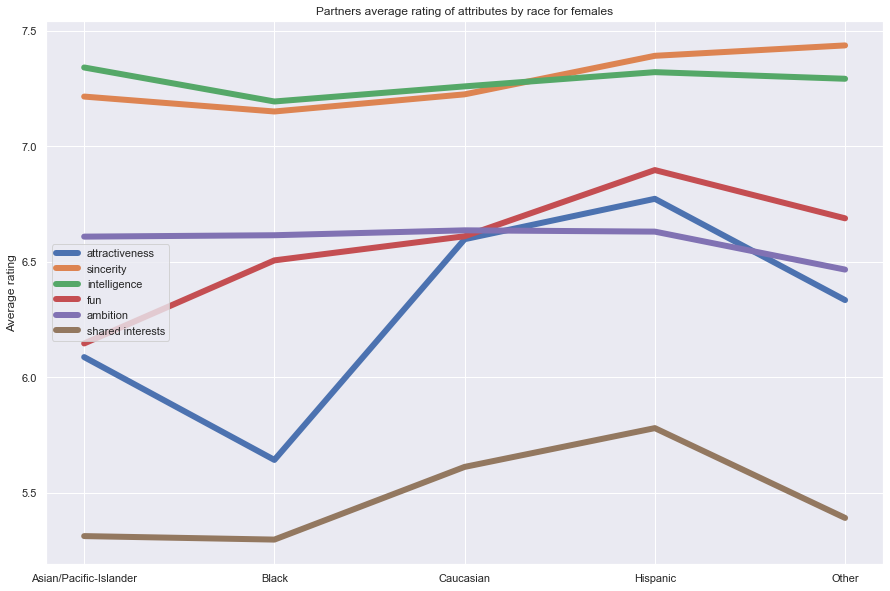

In [51]:
race_values = {1: 'Black', 2: 'Caucasian', 3: 'Hispanic', 4: 'Asian/Pacific-Islander', 5: 'Native American', 6: 'Other'}
females['race_values']=np.round(females['race'],0).map(race_values)
females_race = females.groupby('race_values')[partner_rating_columns].agg(['mean'])
plt.subplots(figsize=(15, 10))
for column in partner_rating_columns:
    plt.plot(females_race.index, females_race[column], linewidth=6)
plt.legend(['attractiveness', 'sincerity', 'intelligence', 'fun', 'ambition', 'shared interests'])
plt.ylabel('Average rating')
plt.title('Partners average rating of attributes by race for females')

The females grouping (also described as the male ratings) look a lot different than the overall ratings amongst races, with ambition ratings seeing a large drop, sincerity rising, and more variation being present in the attractiveness measure.

In [52]:
data.head()

,iid,id,gender,idg,wave,partner,pid,match,int_corr,samerace,age_partmer,race_partner,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,race,imprace,imprelig,goal,date_frequency,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,purpose,age_bins,race_values
0,1,1.0,0,1,1,1,11.0,0,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,4.0,2.0,4.0,2.0,1,7,lawyer,5.296573,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,15.0,20.0,20.0,15.0,15.0,15.0,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.000000,2.0,4.0,non-romantic,"(18, 22]",Asian/Pacific-Islander
1,1,1.0,0,1,1,2,12.0,0,0.54,0,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,4.0,2.0,4.0,2.0,1,7,lawyer,5.296573,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,15.0,20.0,20.0,15.0,15.0,15.0,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.000000,1.0,4.0,non-romantic,"(18, 22]",Asian/Pacific-Islander
2,1,1.0,0,1,1,3,13.0,1,0.16,1,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,4.0,2.0,4.0,2.0,1,7,lawyer,5.296573,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,15.0,20.0,20.0,15.0,15.0,15.0,1,5.0,8.0,9.0,8.0,5.0,7.0,7.0,5.151008,1.0,4.0,non-romantic,"(18, 22]",Asian/Pacific-Islander
3,1,1.0,0,1,1,4,14.0,1,0.61,0,23.0,2.0,30.0,5.0,15.0,40.0,5.0,5.0,1,7.0,8.0,9.0,8.0,9.0,8.0,7.0,7.0,2.0,21.0,4.0,2.0,4.0,2.0,1,7,lawyer,5.296573,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,15.0,20.0,20.0,15.0,15.0,15.0,1,7.0,6.0,8.0,7.0,6.0,8.0,7.0,6.000000,2.0,4.0,non-romantic,"(18, 22]",Asian/Pacific-Islander
4,1,1.0,0,1,1,5,15.0,1,0.21,0,24.0,3.0,30.0,10.0,20.0,10.0,10.0,20.0,1,8.0,7.0,9.0,6.0,9.0,7.0,8.0,6.0,2.0,21.0,4.0,2.0,4.0,2.0,1,7,lawyer,5.296573,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,15.0,20.0,20.0,15.0,15.0,15.0,1,5.0,6.0,7.0,7.0,6.0,6.0,6.0,6.000000,2.0,4.0,non-romantic,"(18, 22]",Asian/Pacific-Islander


In [53]:
#drop columns created for analyses purposes
data = data.drop(columns=['age_bins', 'race_values'])

In [54]:
data.to_csv('cleaned_speed_dating.csv')